## Pandas 데이터 분석 연습 문제: 시애틀 자전거 통행량

이 문제는 시애틀의 Fremont Bridge 자전거 통행량 데이터를 분석하는 연습을 제공합니다. pandas를 활용하여 데이터 전처리, 날짜 기반 분석, 날씨 데이터 병합 및 상관관계 분석을 수행합니다. (p234 참고)

---

<img src="https://images.seattletimes.com/wp-content/uploads/2020/01/01022020_bike-count_114545.jpg?d=2040x1360" width=400>

Ken Lambert, "Bike ridership hits record highs on 2 Seattle routes", The Seattle Times, Jan. 6, 2020


## 1. 자전거 통행량 데이터 기본 전처리

FremontBridge.csv 파일을 사용하여 시애틀 다리의 자전거 통행량 데이터를 불러오고 기본적인 전처리 작업을 수행합니다.

In [1]:
import numpy as np
import pandas as pd




### 1.1 데이터 읽기

- **목표**: FremontBridge.csv 파일을 pandas DataFrame으로 읽어와 df_bike 변수에 저장합니다.
- **힌트**:
    - pandas의 read_csv 함수를 사용하세요.
    - 파일의 경로와 이름을 인자로 전달합니다. (url: 'https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/FremontBridge.csv')



In [2]:
bycycle_url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/FremontBridge.csv'
df_bike = pd.read_csv(bycycle_url)

### 1.2 데이터 미리보기

- **목표**: df_bike DataFrame의 처음 5개 행을 출력하여 데이터 구조와 값을 확인합니다.
- **힌트**:
    - DataFrame의 head 메서드를 사용하면 처음 5개 행을 확인할 수 있습니다.



In [3]:
df_bike.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


### 1.3 데이터 요약 정보 확인

- **목표**: df_bike DataFrame의 컬럼명, 데이터 타입, 유효 값 개수, 메모리 사용량 등 요약 정보를 확인합니다.
- **힌트**:
    - DataFrame의 info 메서드를 호출하여 요약 정보를 확인하세요.



In [4]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147278 entries, 0 to 147277
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          147278 non-null  object 
 1   Fremont Bridge Total          147256 non-null  float64
 2   Fremont Bridge East Sidewalk  147256 non-null  float64
 3   Fremont Bridge West Sidewalk  147255 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.5+ MB


### 1.4 데이터 타입 및 누락값 상세 확인

- **목표**: 각 컬럼의 데이터 타입과 누락값(NaN)의 개수를 확인합니다.
- **힌트**:
    - 데이터 타입은 dtypes 속성으로 확인합니다.
    - 누락값은 isnull 메서드와 sum 메서드를 조합하여 컬럼별 합계를 계산합니다.



In [5]:
df_bike.dtypes

Date                             object
Fremont Bridge Total            float64
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [6]:
df_bike[df_bike['Fremont Bridge Total'].isnull()] # 'Fremont Bridge Total' 이름을 가진 열 중에서 결측치인 값들만 모아서 반환

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
12338,06/14/2013 09:00:00 AM,NaN,NaN,NaN
12339,06/14/2013 10:00:00 AM,NaN,NaN,NaN
18763,03/09/2014 02:00:00 AM,NaN,NaN,NaN
27499,03/08/2015 02:00:00 AM,NaN,NaN,NaN
28564,04/21/2015 11:00:00 AM,NaN,NaN,NaN
28565,04/21/2015 12:00:00 PM,NaN,NaN,NaN
36436,03/13/2016 02:00:00 AM,NaN,NaN,NaN
45172,03/12/2017 02:00:00 AM,NaN,NaN,NaN
53908,03/11/2018 02:00:00 AM,NaN,NaN,NaN
68103,06/14/2013 09:00:00 AM,NaN,NaN,NaN


In [7]:
df_bike.isnull().sum()

Date                             0
Fremont Bridge Total            22
Fremont Bridge East Sidewalk    22
Fremont Bridge West Sidewalk    23
dtype: int64

### 1.5 컬럼명 변경

- **목표**: df_bike DataFrame의 컬럼명을 다음과 같이 변경합니다:
    - Fremont Bridge Total → Total
    - Fremont Bridge East Sidewalk → East
    - Fremont Bridge West Sidewalk → West

In [8]:
df_bike.rename(columns=
               {'Fremont Bridge Total':'Total', 
                'Fremont Bridge East Sidewalk':'East', 
                'Fremont Bridge West Sidewalk':'West'}, inplace=True) # inplace=True : 기존 데이터프레임을 수정해줌

In [9]:
# 혹은
df_bike.columns = ['Date', 'Total', 'East', 'West']

In [10]:
df_bike

,Date,Total,East,West
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0
...,...,...,...,...
147273,12/31/2021 07:00:00 PM,0.0,0.0,0.0
147274,12/31/2021 08:00:00 PM,0.0,0.0,0.0
147275,12/31/2021 09:00:00 PM,0.0,0.0,0.0
147276,12/31/2021 10:00:00 PM,0.0,0.0,0.0


### 1.6 'Date' 컬럼 타입 변경

- **목표**: Date 컬럼을 문자열(object)에서 datetime 형식으로 변환하여 df_bike['Date']에 할당합니다.
- **힌트**:
    - pandas의 to_datetime 함수에 df_bike['Date']를 전달하여 변환합니다.



In [11]:
df_bike['Date'] = pd.to_datetime(df_bike['Date'], format="%m/%d/%Y %I:%M:%S %p") 
# pd.to_datetime() : 문자열을 날짜타입(datetime64 타입)으로 변환
# format으로 날짜/시간의 정확한 구조를 Pandas에게 알려줌 -> 이 형식에 맞춰서 데이터를 파싱(parsing)하므로 시간이 단축됨

In [12]:
df_bike.info() # datetime64 으로 데이터 타입이 변환되었는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147278 entries, 0 to 147277
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    147278 non-null  datetime64[ns]
 1   Total   147256 non-null  float64       
 2   East    147256 non-null  float64       
 3   West    147255 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.5 MB


### 1.7 'Date' 컬럼을 인덱스로 설정

- **목표**: datetime 형식으로 변환된 Date 컬럼을 df_bike의 행 인덱스로 설정합니다.
- **힌트**:
    - set_index 메서드에 Date 컬럼명을 전달합니다.



In [13]:
df_bike = df_bike.sort_values(['Date']) # Date 컬럼명을 컬럼을 찾아서, 그 값을 기준으로 데이터 프레임을 정렬 (날짜순 정렬)

In [14]:
df_bike = df_bike.set_index('Date') # Date 컬럼명을 컬럼을 찾아서, 그 값을 df_bike의 행인덱스로 전달

In [15]:
df_bike

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
...,...,...,...
2021-12-31 19:00:00,0.0,0.0,0.0
2021-12-31 20:00:00,0.0,0.0,0.0
2021-12-31 21:00:00,0.0,0.0,0.0


### 1.8 누락값 처리

- **목표**: Total, East, West 컬럼의 누락값(NaN)을 각 컬럼의 평균값으로 채웁니다.
- **힌트**:
    - 각 컬럼에 fillna 메서드를 사용하고, 채울 값으로 해당 컬럼의 mean 값을 전달합니다.


In [16]:
total_mean = df_bike['Total'].mean()
east_mean = df_bike['East'].mean()
west_mean = df_bike['East'].mean()
total_mean, east_mean, west_mean

df_bike['Total'] = df_bike['Total'].fillna(total_mean)
df_bike['East'] = df_bike['East'].fillna(east_mean)
df_bike['West'] = df_bike['West'].fillna(west_mean)

In [17]:
df_bike.isnull().sum()

Total    0
East     0
West     0
dtype: int64



## 2. 날짜 관련 데이터 분석 (자전거 통행량)

시간 정보를 활용하여 자전거 통행량의 패턴을 분석하고 시각화합니다.



### 2.1 주간 단위 총 통행량 시각화

- **목표**: Total 컬럼의 일별 통행량을 주간 단위로 합산하여 선 그래프(line plot)로 시각화합니다.
- **힌트**:
    - Total 컬럼을 선택한 후 resample('W')로 주간 단위로 그룹화하고 sum으로 합계를 계산합니다.
    - plot 메서드로 선 그래프를 그립니다.



C:\Users\user\AppData\Local\Temp\ipykernel_16768\1692194487.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_bike_total.resample("M").sum().plot()
C:\Users\user\AppData\Local\Temp\ipykernel_16768\1692194487.py:4: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  df_bike_total.resample("B").sum().plot()


<Axes: xlabel='Date'>

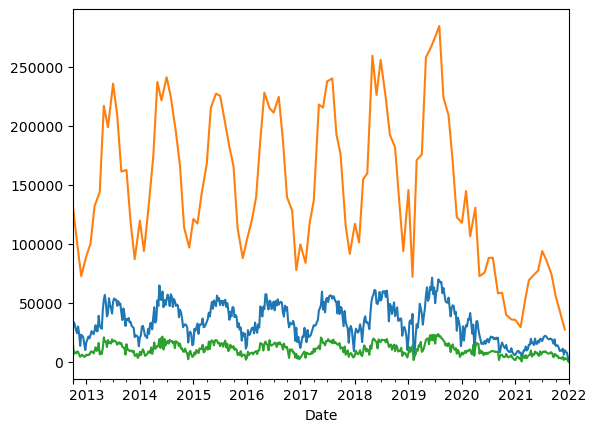

In [18]:
df_bike_total = df_bike.loc[:,'Total']
df_bike_total.resample("W").sum().plot()
df_bike_total.resample("M").sum().plot()
df_bike_total.resample("B").sum().plot()

### 2.2 시간대별 평균 통행량 시각화

- **목표**: 하루 24시간(0~23시)별 평균 Total 통행량을 계산하고 막대 그래프(bar plot)로 시각화합니다.
- **힌트**:
    - 인덱스의 시간 정보(df_bike.index.hour)를 기준으로 groupby 연산을 수행합니다.
    - Total 컬럼의 mean 값을 계산하고 plot(kind='bar')로 막대 그래프를 그립니다.



<Axes: xlabel='Date'>

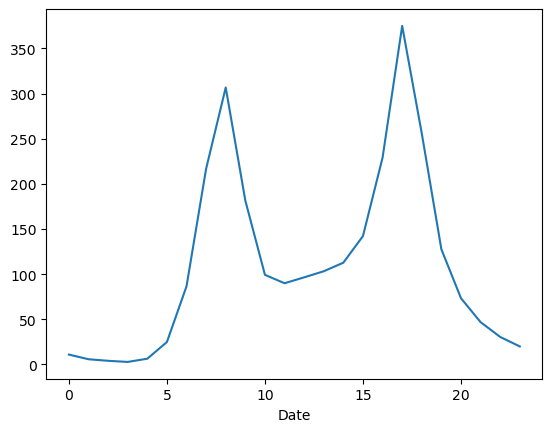

In [19]:
df_bike_total = df_bike.groupby(df_bike.index.hour)['Total']
df_bike_total.mean().plot()

In [51]:
df_bike.groupby(df_bike.index.time).mean()

,Total,East,West
00:00:00,10.939384,4.595894,6.343490
01:00:00,5.780838,2.572104,3.208734
02:00:00,4.040862,1.919681,2.097944
03:00:00,2.805931,1.423660,1.382271
04:00:00,6.375754,3.320515,3.063399
05:00:00,24.840965,14.986638,9.854326
06:00:00,86.552550,51.292651,35.259899
07:00:00,216.827277,133.097279,83.729998
08:00:00,306.741242,178.783608,127.957634
09:00:00,181.444302,97.185621,84.255362


### 2.3 요일별 평균 통행량 시각화

- **목표**: 요일별(월~일) 평균 Total 통행량을 계산하고 막대 그래프로 시각화합니다.
- **힌트**:
    - 인덱스의 요일 이름(df_bike.index.day_name())을 기준으로 groupby 연산을 수행합니다.
    - Total 컬럼의 mean 값을 계산하고 plot(kind='bar')로 막대 그래프를 그립니다.



<Axes: xlabel='Date'>

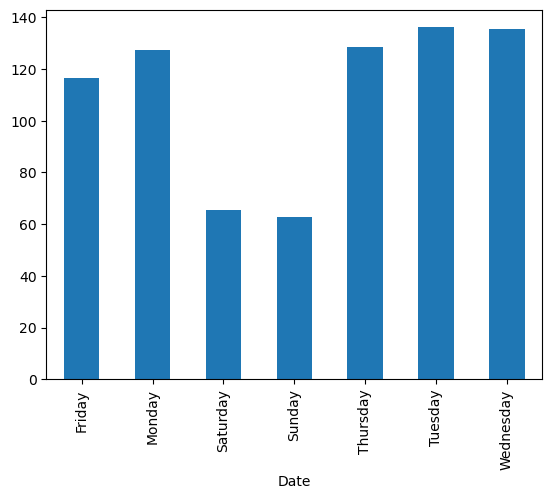

In [20]:
df_bike_total = df_bike.groupby(df_bike.index.day_name())['Total']
df_bike_total.mean().plot(kind='bar')

In [53]:
df_bike.groupby(df_bike.index.day).mean()

,Total,East,West
Date,,,
1,109.710208,50.148750,59.561458
2,110.501250,50.542708,59.958542
3,113.271452,51.556106,61.715347
4,113.424299,51.980611,61.443688
5,110.533210,50.185644,60.347566
6,114.961015,52.569101,62.391914
7,111.940594,51.257632,60.682962
8,112.685648,51.818324,60.871351
9,114.731164,51.834603,62.892359


### 2.4 요일 및 시간대별 평균 통행량 (Pivot Table)

- **목표**: 피벗 테이블을 사용하여 시간대(행)와 요일(열)에 따른 평균 Total 통행량 표를 생성합니다.
- **힌트**:
    - pivot_table 메서드에서 values='Total', index=df_bike.index.hour, columns=df_bike.index.day_name(), aggfunc='mean'을 지정합니다.



### 2.5 30일 이동 평균 통행량 시각화

- **목표**: Total 통행량의 30일 이동 평균을 계산하고 선 그래프로 시각화합니다.
- **힌트**:
    - Total 컬럼에 rolling(window=30)을 적용하고 mean으로 평균을 계산합니다.
    - plot 메서드로 선 그래프를 그립니다.



## 3. 날씨 데이터 병합 및 분석

SeattleWeather.csv 파일의 날씨 데이터를 읽어와 자전거 통행량 데이터와 병합하여 날씨와 통행량의 관계를 분석합니다.


### 3.1 날씨 데이터 읽기 및 기본 전처리

- **목표**:
    - SeattleWeather.csv 파일을 df_weather DataFrame으로 읽습니다. (url: https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/SeattleWeather.csv)
    - DATE 컬럼을 datetime 형식으로 변환하고 인덱스로 설정합니다.
    - PRCP 컬럼의 누락값을 0으로 채웁니다.


In [64]:
weather_url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/SeattleWeather.csv'
weather_df = pd.read_csv(weather_url)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  3653 non-null   object 
 1   NAME     3653 non-null   object 
 2   DATE     3653 non-null   object 
 3   AWND     3653 non-null   float64
 4   FMTM     31 non-null     float64
 5   PGTM     83 non-null     float64
 6   PRCP     3650 non-null   float64
 7   SNOW     3653 non-null   float64
 8   SNWD     3653 non-null   float64
 9   TAVG     3197 non-null   float64
 10  TMAX     3653 non-null   int64  
 11  TMIN     3653 non-null   int64  
 12  WDF2     3653 non-null   int64  
 13  WDF5     3615 non-null   float64
 14  WSF2     3653 non-null   float64
 15  WSF5     3615 non-null   float64
 16  WT01     1630 non-null   float64
 17  WT02     187 non-null    float64
 18  WT03     38 non-null     float64
 19  WT04     10 non-null     float64
 20  WT05     4 non-null      float64
 21  WT08     215 n

In [39]:
weather_url = 'https://raw.githubusercontent.com/jakevdp/bicycle-data/refs/heads/main/SeattleWeather.csv'
weather_df = pd.read_csv(weather_url)

weather_df['DATE'] = pd.to_datetime(weather_df['DATE']) 
weather_df = weather_df.sort_values(['DATE']) # Date 컬럼명을 컬럼을 찾아서, 그 값을 기준으로 데이터 프레임을 정렬 (날짜순 정렬)
weather_df = weather_df.set_index('DATE') # Date 컬럼명을 컬럼을 찾아서, 그 값을 wether_df의 행인덱스로 전달

weather_df['PRCP'].fillna(0) #누락값을 0으로 채우기
weather_df


,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",9.62,NaN,NaN,0.03,0.5,3.1,20.0,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-28,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.50,NaN,NaN,NaN,1.0,2.0,25.0,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-29,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.50,NaN,NaN,0.13,0.9,2.0,26.0,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2 데이터프레임 병합 (Merge)

- **목표**: df_bike와 df_weather를 날짜 인덱스를 기준으로 병합하여 df_merged에 저장합니다.
- **힌트**:
    - pd.merge 함수에 df_bike, df_weather, left_index=True, right_index=True 옵션을 전달합니다.



In [54]:
df = df_bike.resample('D')[['Total','East',	'West']].sum()
df.shape

(3377, 3)

In [55]:
df_merged = pd.merge(df, weather_df, left_index=True, right_index=True)
df_merged

,Total,East,West,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
2012-10-03,7042.0,3520.0,3522.0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",16.33,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,6950.0,3416.0,3534.0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",14.54,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,6296.0,3116.0,3180.0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",12.75,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,4012.0,2160.0,1852.0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",11.41,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-07,4284.0,2382.0,1902.0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2.91,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,74.0,23.0,51.0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",9.62,NaN,NaN,0.03,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-28,91.0,32.0,59.0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.50,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-29,75.0,32.0,43.0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.50,NaN,NaN,0.13,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-30,77.0,37.0,40.0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",9.62,NaN,NaN,NaN,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.3 강수량과 자전거 통행량 관계 분석

- **목표**:
    - PRCP와 Total 간의 관계를 산점도(scatter plot)로 시각화합니다.
    - 두 변수의 상관계수를 계산합니다.
- **힌트**:
    - df_merged.plot.scatter로 산점도를 그립니다.
    - sns.scatterplot 로 산점도를 그립니다.
    - df_merged['PRCP'].corr 로 상관계수를 계산합니다.



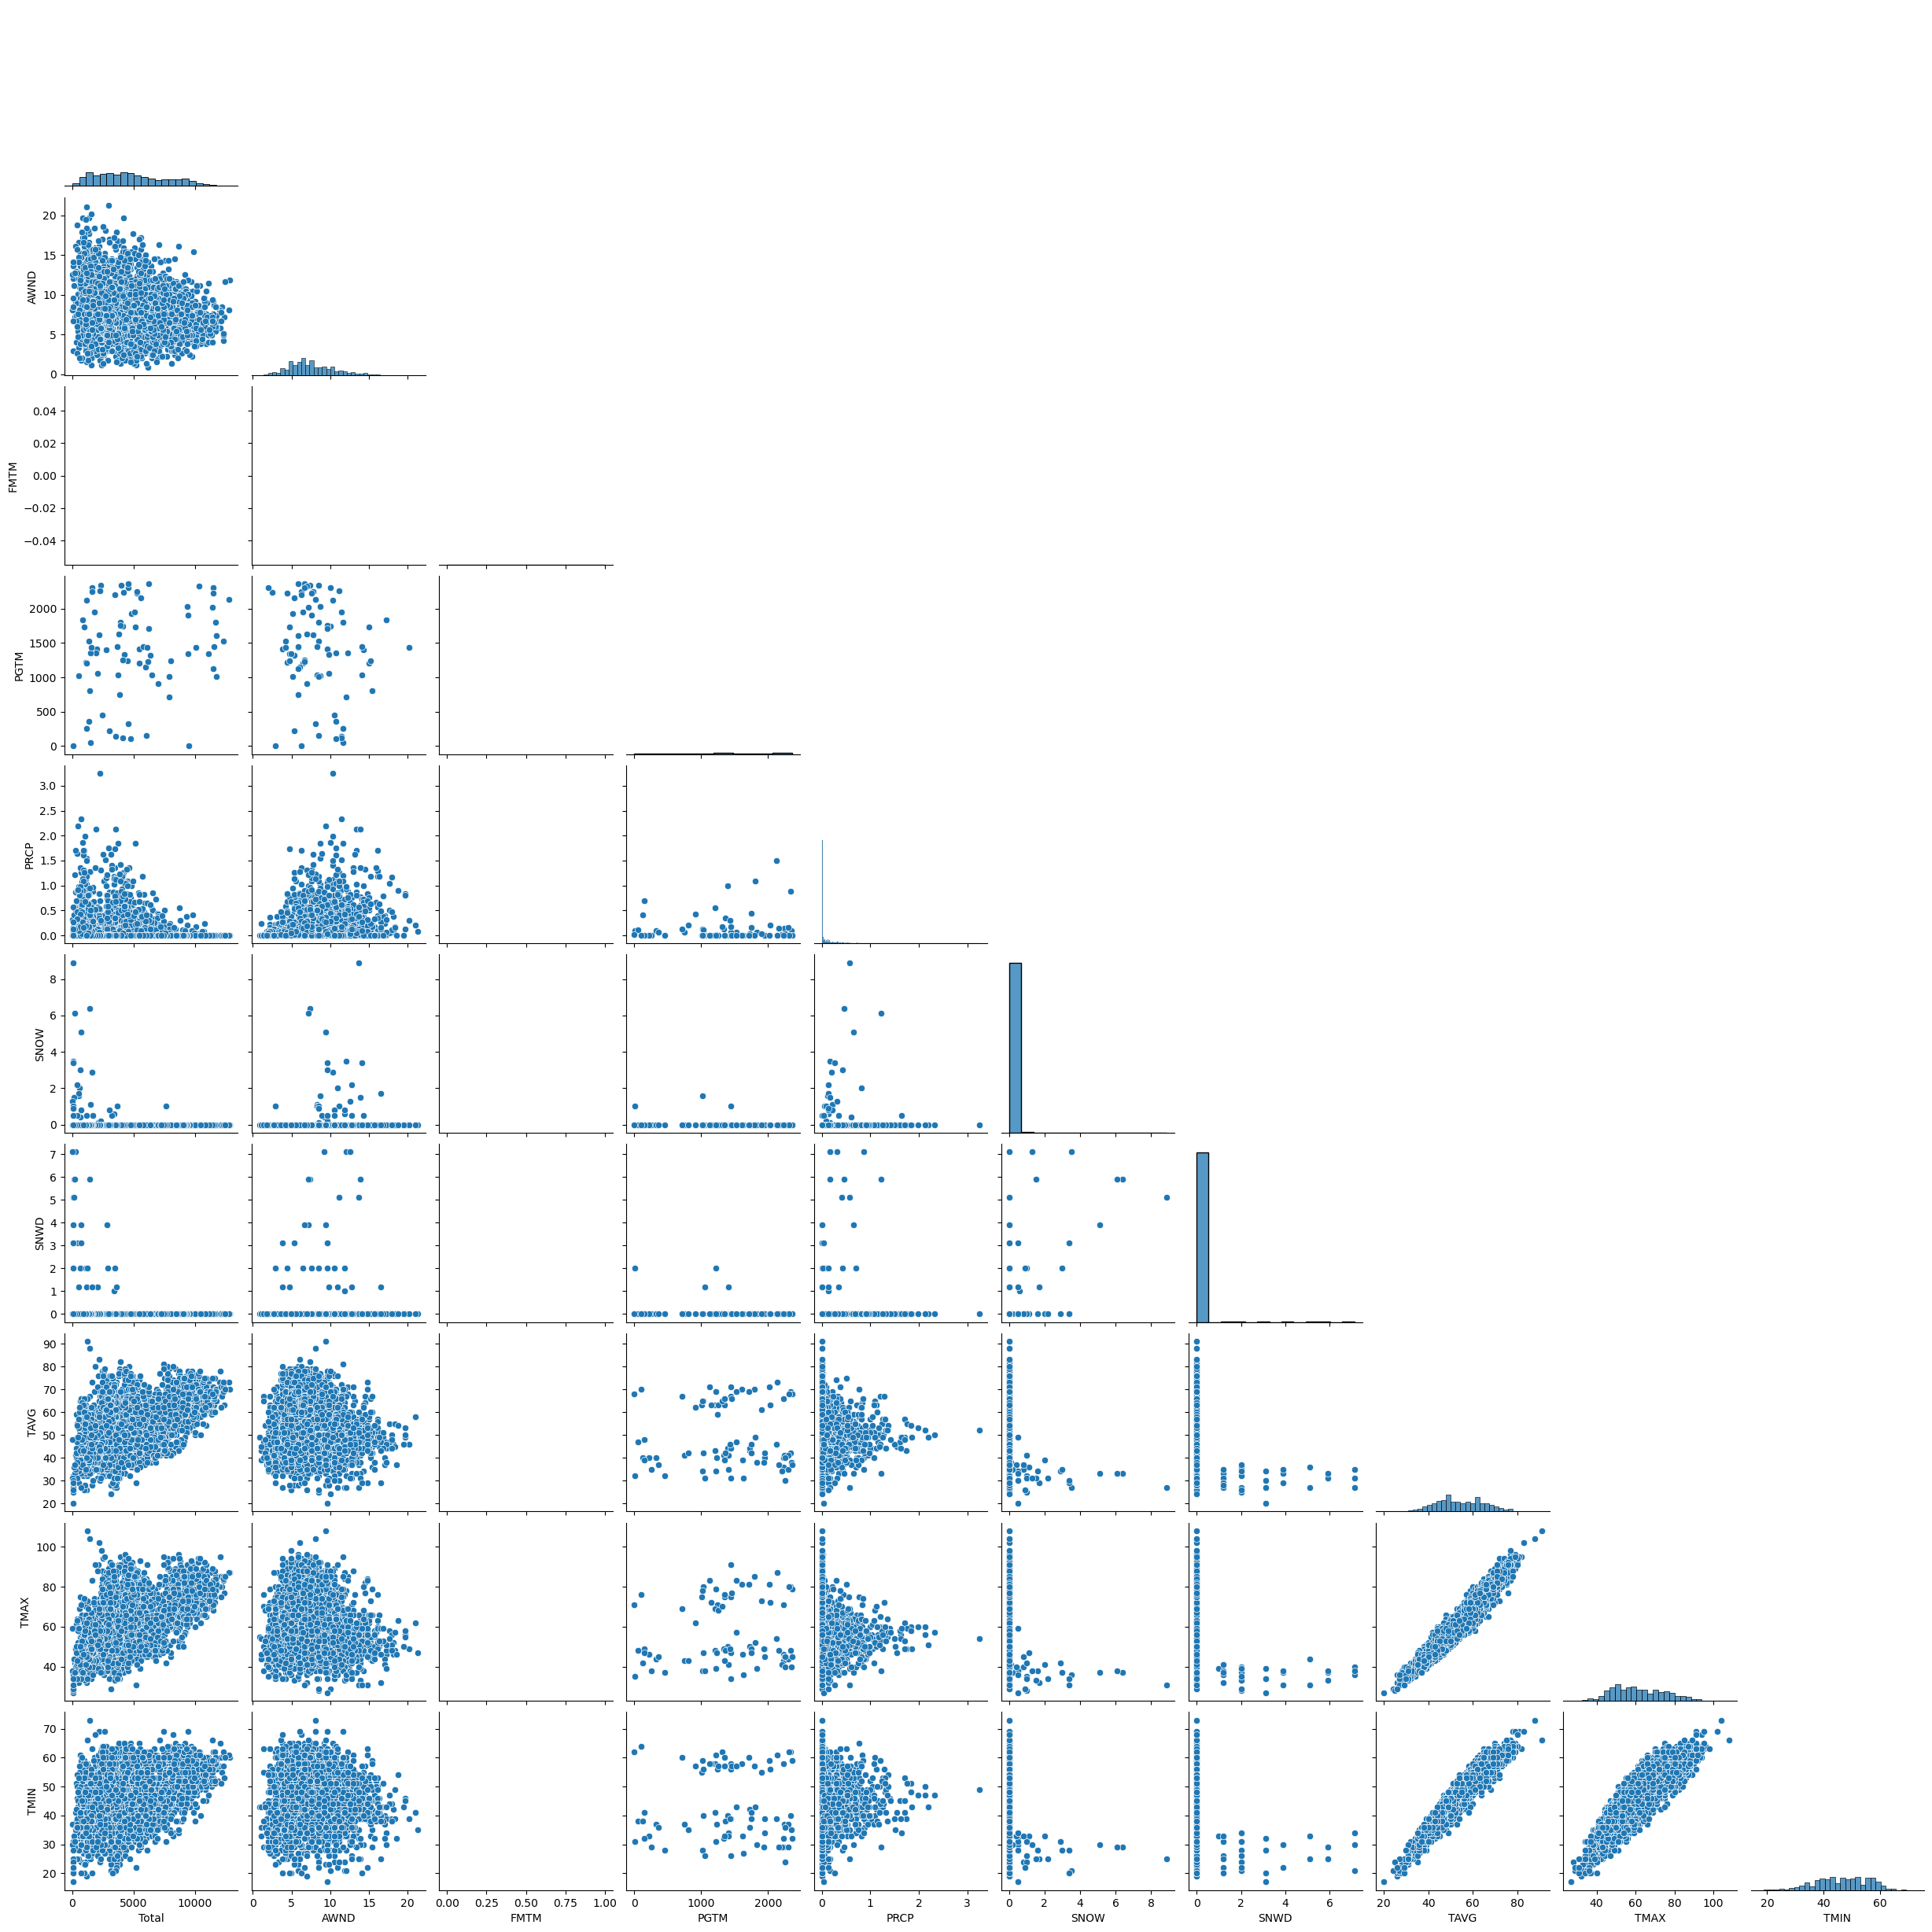

In [63]:
import seaborn as sns
col = ['Total', 'AWND', 'FMTM', 'PGTM', 'PRCP', 'SNOW', 'SNWD','TAVG', 'TMAX', 'TMIN']
df4 = df_merged[col]
sns.pairplot(df4, corner=True)

In [58]:
df4.corr()

,Total,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG
Total,1.000000,-0.212635,NaN,0.165179,-0.293844,-0.098830,-0.119933,0.473484
AWND,-0.212635,1.000000,NaN,-0.167878,0.284208,0.062424,0.045056,-0.141317
FMTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PGTM,0.165179,-0.167878,NaN,1.000000,0.033004,-0.158077,-0.187290,0.021656
PRCP,-0.293844,0.284208,NaN,0.033004,1.000000,0.085096,0.065760,-0.179003
SNOW,-0.098830,0.062424,NaN,-0.158077,0.085096,1.000000,0.613773,-0.147886
SNWD,-0.119933,0.045056,NaN,-0.187290,0.065760,0.613773,1.000000,-0.181205
TAVG,0.473484,-0.141317,NaN,0.021656,-0.179003,-0.147886,-0.181205,1.000000


In [59]:
df4.cov()

,Total,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG
Total,7.940907e+06,-1852.079929,NaN,388838.173376,-215.436575,-77.627206,-121.240663,14401.727631
AWND,-1.852080e+03,9.553900,NaN,-398.617420,0.228721,0.053781,0.049959,-4.592117
FMTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PGTM,3.888382e+05,-398.617420,NaN,455229.689686,5.935585,-24.716897,-44.973670,202.018807
PRCP,-2.154366e+02,0.228721,NaN,5.935585,0.067796,0.006031,0.006050,-0.490305
SNOW,-7.762721e+01,0.053781,NaN,-24.716897,0.006031,0.077693,0.061372,-0.451037
SNWD,-1.212407e+02,0.049959,NaN,-44.973670,0.006050,0.061372,0.128690,-0.710922
TAVG,1.440173e+04,-4.592117,NaN,202.018807,-0.490305,-0.451037,-0.710922,113.518364


<Axes: >

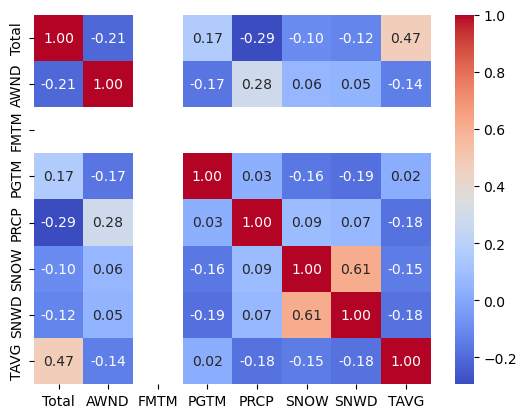

In [61]:
sns.heatmap(df4.corr(), annot=True, cmap = 'coolwarm', fmt='.2f')

### 3.4 기온과 자전거 통행량 관계 분석

- **목표**: TAVG(또는 TMAX, TMIN)와 Total 간의 관계를 산점도 또는 구간별 평균 통행량으로 분석합니다.
- **힌트**:
    - 산점도는 df_merged.plot.scatter(x='TAVG', y='Total')로 그립니다.
    - 구간별 분석은 pd.cut으로 기온을 구간화하고 groupby로 평균을 계산한 후 plot으로 시각화합니다.



### 3.5 날씨 조건에 따른 통행량 비교

- **목표**: 비가 온 날(PRCP > 0)과 비가 오지 않은 날(PRCP = 0)의 평균 Total 통행량을 비교합니다.
- **힌트**:
    - 불리언 인덱싱으로 조건 (비가 온 날과 비가 오지 않은 날)을 설정합니다.